In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
#expression_energy = pd.read_csv("../dat/allen-mouse-exp/replicate/expression_energy.csv")
expression_energy = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model.csv", index_col="ROW")
STR_volume = pd.read_csv("dat/voxel.csv", index_col="KEY")

In [6]:
expression_energy.shape

(15681, 213)

In [7]:
expression_energy.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.129948,0.060500,0.063547,0.046318,0.029235,0.283072,0.026315,NaN,0.072782,0.058972,...,0.031173,0.242497,0.007004,0.104897,0.272817,0.107278,0.140856,0.109031,0.251835,0.214892
2,0.065605,0.012055,0.030225,0.048060,0.375491,0.102894,0.228004,0.093791,0.174076,0.046022,...,0.040116,0.016684,0.171418,0.158988,0.112546,0.051621,0.059596,0.112288,0.274680,1.004292


In [8]:
STR_volume.head(2)

,VOLUME
KEY,
Basic_cell_groups_and_regions,417724
Cerebrum,261163


## Missing Value Distribution

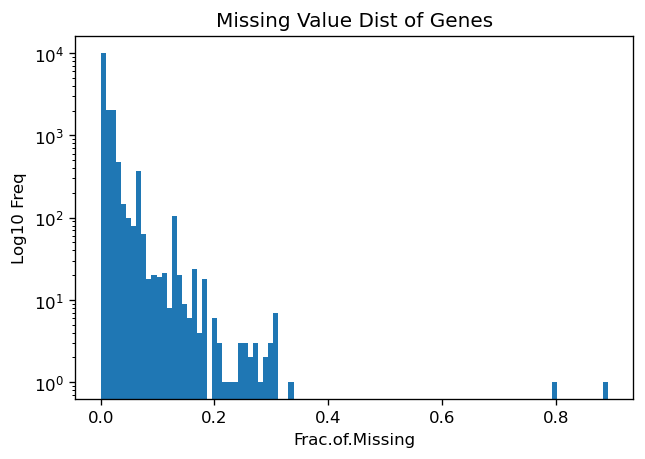

In [9]:
NullFrac = []
for i,row in expression_energy.iterrows():
    Nnull = row.isnull().sum()
    NullFrac.append(Nnull/len(row))
fig = plt.figure(dpi=120)
plt.hist(NullFrac, bins=100)
plt.yscale('log')
plt.title("Missing Value Dist of Genes")
plt.xlabel("Frac.of.Missing")
plt.ylabel("Log10 Freq")
plt.show()

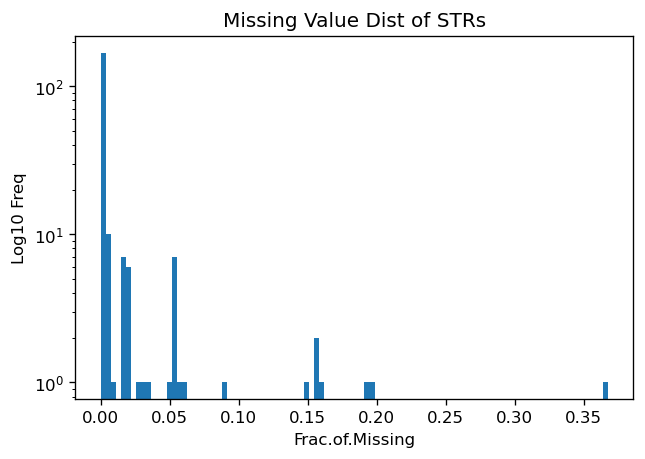

In [10]:
NullFrac = []
for col in expression_energy.columns.values:
    COL = expression_energy[col]
    Nnull = COL.isnull().sum()
    NullFrac.append(Nnull/len(COL))
fig = plt.figure(dpi=120)
plt.hist(NullFrac, bins=100)
plt.yscale('log')
plt.title("Missing Value Dist of STRs")
plt.xlabel("Frac.of.Missing")
plt.ylabel("Log10 Freq")
plt.show()

## Calculate Matching Features

In [11]:
expression_energy_mis0 = expression_energy.fillna(0)

In [4]:
volumes_213 = []
for STR in expression_energy.columns.values:
    vol = STR_volume.loc[STR, "VOLUME"]
    volumes_213.append(vol)
volumes_213 = np.array(volumes_213)
    #print(STR)

In [5]:
g_exp_whole_brain = []
writer = csv.writer(open("./dat/gene_match_features.csv", 'wt'))
writer.writerow(["Entrez", "Exp.Volume.Weighted.Mean", "Exp.Volume.Weighted.Mean.Nan.to.0", 
                 "Exp.Mean.Nan.to.0", "Exp.Mean.Rm.Nan"])
for g, row in expression_energy.iterrows():
    rep_na_zero = np.array(row.fillna(0).values)
    rm_na = np.array([x for x in row.values if x==x])
    
    c_gexp = []; c_volume = []
    for exp, vol in zip(row.values, volumes_213):
        if exp == exp:
            c_gexp.append(exp)
            c_volume.append(vol)
    c_gexp = np.array(c_gexp); c_volume = np.array(c_volume)
    exp0 = np.sum(c_gexp * c_volume) / np.sum(c_volume)
    exp1 = sum(rep_na_zero * volumes_213) / sum(volumes_213) # volume weighted
    exp2 = np.mean(rep_na_zero) # just mean
    exp3 = np.mean(rm_na) # ignore missing values
    writer.writerow([g, exp0, exp1, exp2, exp3])

In [6]:
matching_features = pd.read_csv("./dat/gene_match_features.csv")
matching_features.head(2)

,Entrez,Exp.Volume.Weighted.Mean,Exp.Volume.Weighted.Mean.Nan.to.0,Exp.Mean.Nan.to.0,Exp.Mean.Rm.Nan
0,1,0.064841,0.060939,0.111468,0.116959
1,2,0.296199,0.295117,0.282343,0.283675


[]

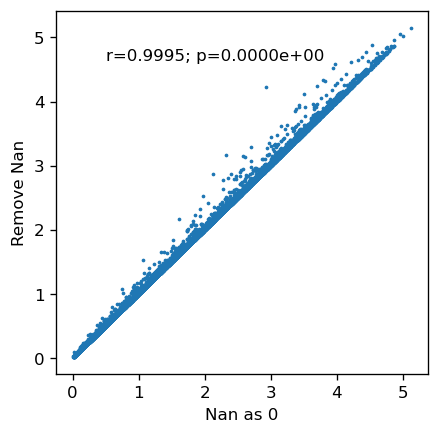

In [15]:
x = matching_features["Exp.Mean.Nan.to.0"].values
y = matching_features["Exp.Mean.Rm.Nan"].values 
plt.figure(dpi=120, figsize=(4,4))
plt.scatter(x,y,s=1.5)
plt.xlabel("Nan as 0")
plt.ylabel("Remove Nan")
r, p = pearsonr(x,y)
plt.text(x=max(x)*0.1, y = max(y)*0.9, s="r=%.4f; p=%.4e"%(r, p))
plt.plot()

[]

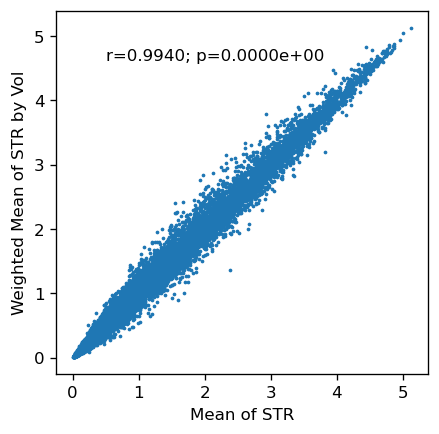

In [16]:
x = matching_features["Exp.Mean.Nan.to.0"].values
y = matching_features["Exp.Volume.Weighted.Mean"].values 
plt.figure(dpi=120, figsize=(4,4))
plt.scatter(x,y,s=1.5)
plt.xlabel("Mean of STR")
plt.ylabel("Weighted Mean of STR by Vol")
r, p = pearsonr(x,y)
plt.text(x=max(x)*0.1, y = max(y)*0.9, s="r=%.4f; p=%.4e"%(r, p))
plt.plot()

## Log and QuantileNorm, Expression Zscore Calculate

In [3]:
df = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model-no_log-no_quant_norm.csv", index_col="ROW")
df = df.fillna(0) # fill missing value with 0
for c in df.columns.values:   
    df[c] = np.log2(1+df[c])   # log2
df = quantileNormalize(df)     # qt norm

In [4]:
df.to_csv("../dat/allen-mouse-exp/new-energy-conn-model.csv")

In [5]:
df_z = []
for i in df.index.values :
    i_z = ZscoreConverting(df.loc[i,:].values)
    df_z.append(i_z)
df_z = pd.DataFrame(data=df_z, columns=df.columns.values, index=df.index.values)
df_z.to_csv("../dat/allen-mouse-exp/new-energy-conn-zscore.csv")

## Expression Matching Genes

In [7]:
# Load expressions
match_feature = pd.read_csv("./dat/gene_match_features.csv", index_col="Entrez")
match_feature = match_feature.sort_values("Exp.Volume.Weighted.Mean")
match_feature["Rank"] = [1+x for x in range(match_feature.shape[0])] # compute Rank
match_feature["quantile"] = match_feature["Rank"]/match_feature.shape[0]

In [12]:
asd_agg = loadgenelist("../dat/genes/asd/agg.FDR0.2.txt")
df = ExpressionMatchGeneSet(asd_agg, match_feature, savefil="dat/matching/asd_agg_exp_matches_1000.new1.csv")
asd_asc = loadgenelist("../dat/genes/asd/asd.asc.entrez.list")
df = ExpressionMatchGeneSet(asd_asc, match_feature, savefil="dat/matching/asd_asc_exp_matches_1000.new1.csv")
asd_spark_tada = loadgenelist("../dat/genes/asd/asd.spark.tada.txt")
df = ExpressionMatchGeneSet(asd_spark_tada, match_feature, savefil="dat/matching/asd_sparktada_exp_matches_1000.new1.csv")

In [9]:
asd_agg = loadgenelist("../dat/genes/asd/agg.FDR0.2.txt")
df = ExpressionMatchGeneSet(asd_agg, match_feature, savefil="dat/matching/asd_agg_exp_matches_1000.new2.csv")
asd_asc = loadgenelist("../dat/genes/asd/asd.asc.entrez.list")
df = ExpressionMatchGeneSet(asd_asc, match_feature, savefil="dat/matching/asd_asc_exp_matches_1000.new2.csv")
asd_spark_tada = loadgenelist("../dat/genes/asd/asd.spark.tada.txt")
df = ExpressionMatchGeneSet(asd_spark_tada, match_feature, savefil="dat/matching/asd_sparktada_exp_matches_1000.new2.csv")

In [10]:
ssc_sibling = loadgenelist("../dat/genes/asd/asd.sib.entrez.list")
df = ExpressionMatchGeneSet(ssc_sibling, match_feature, savefil="dat/matching/asd_sib_exp_matches_1000.new1.csv")
df = ExpressionMatchGeneSet(ssc_sibling, match_feature, savefil="dat/matching/asd_sib_exp_matches_1000.new2.csv")

In [ ]:
ssc_sibling = loadgenelist("../dat/genes/asd/asd.sib.entrez.list")
df = ExpressionMatchGeneSet(ssc_sibling, match_feature, savefil="dat/matching/asd_sib_exp_matches_1000.new1.csv")
df = ExpressionMatchGeneSet(ssc_sibling, match_feature, savefil="dat/matching/asd_sib_exp_matches_1000.new2.csv")

In [11]:
tmp_sibling = [2200, 10522]
df = ExpressionMatchGeneSet(tmp_sibling, match_feature, savefil="dat/matching/tmp_matches_1000.new1.csv")
df = ExpressionMatchGeneSet(tmp_sibling, match_feature, savefil="dat/matching/tmp_matches_1000.new2.csv")